In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)


In [2]:
df = pd.read_csv('Data/Part_1_Crime_Data.csv',low_memory=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CrimeDateTime         4782 non-null   object 
 1   RAPE                  4779 non-null   float64
 2   LARCENY               4782 non-null   int64  
 3   AGG. ASSAULT          4782 non-null   int64  
 4   LARCENY FROM AUTO     4782 non-null   int64  
 5   BURGLARY              4782 non-null   int64  
 6   COMMON ASSAULT        4782 non-null   int64  
 7   AUTO THEFT            4782 non-null   int64  
 8   ROBBERY               4782 non-null   int64  
 9   ROBBERY - COMMERCIAL  4782 non-null   int64  
 10  ARSON                 4768 non-null   float64
 11  ROBBERY - CARJACKING  4774 non-null   float64
 12  HOMICIDE              4414 non-null   float64
 13  SHOOTING              4398 non-null   float64
dtypes: float64(5), int64(8), object(1)
memory usage: 523.2+ KB


,CrimeDateTime,RAPE,LARCENY,AGG. ASSAULT,LARCENY FROM AUTO,BURGLARY,COMMON ASSAULT,AUTO THEFT,ROBBERY,ROBBERY - COMMERCIAL,ARSON,ROBBERY - CARJACKING,HOMICIDE,SHOOTING
0,2011-01-01 00:00:00+00:00,5.0,39,28,27,21,41,15,5,2,1.0,NaN,NaN,NaN
1,2011-01-02 00:00:00+00:00,2.0,20,6,20,19,14,5,10,1,0.0,NaN,NaN,NaN
2,2011-01-03 00:00:00+00:00,1.0,19,13,16,21,15,7,9,1,0.0,NaN,NaN,NaN
3,2011-01-04 00:00:00+00:00,1.0,29,11,12,12,29,10,4,0,0.0,NaN,NaN,NaN
4,2011-01-05 00:00:00+00:00,0.0,30,9,14,28,26,10,6,2,0.0,NaN,NaN,NaN


In [3]:
test_date = df.loc[0, 'CrimeDateTime']
test_date


'2011-01-01 00:00:00+00:00'

In [4]:
test_datetime = pd.to_datetime(test_date)
test_datetime


Timestamp('2011-01-01 00:00:00+0000', tz='UTC')

## Preparing the Date Time Index

In [5]:
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'])


In [6]:
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'],errors='coerce')


In [7]:
# how many null values did we create?
df['CrimeDateTime'].isna().sum()


0

In [8]:
# drop the single erroneous time
df = df.dropna(subset=['CrimeDateTime'])
df['CrimeDateTime'].isna().sum()


0

In [9]:
## now that we remove NaT's let's make our datetime index
df = df.set_index('CrimeDateTime')
df.head(3)

,RAPE,LARCENY,AGG. ASSAULT,LARCENY FROM AUTO,BURGLARY,COMMON ASSAULT,AUTO THEFT,ROBBERY,ROBBERY - COMMERCIAL,ARSON,ROBBERY - CARJACKING,HOMICIDE,SHOOTING
CrimeDateTime,,,,,,,,,,,,,
2011-01-01 00:00:00+00:00,5.0,39,28,27,21,41,15,5,2,1.0,NaN,NaN,NaN
2011-01-02 00:00:00+00:00,2.0,20,6,20,19,14,5,10,1,0.0,NaN,NaN,NaN
2011-01-03 00:00:00+00:00,1.0,19,13,16,21,15,7,9,1,0.0,NaN,NaN,NaN


In [10]:
df = df.sort_index()
df.index


DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-02 00:00:00+00:00',
               '2011-01-03 00:00:00+00:00', '2011-01-04 00:00:00+00:00',
               '2011-01-05 00:00:00+00:00', '2011-01-06 00:00:00+00:00',
               '2011-01-07 00:00:00+00:00', '2011-01-08 00:00:00+00:00',
               '2011-01-09 00:00:00+00:00', '2011-01-10 00:00:00+00:00',
               ...
               '2024-01-25 00:00:00+00:00', '2024-01-26 00:00:00+00:00',
               '2024-01-27 00:00:00+00:00', '2024-01-28 00:00:00+00:00',
               '2024-01-29 00:00:00+00:00', '2024-01-30 00:00:00+00:00',
               '2024-01-31 00:00:00+00:00', '2024-02-01 00:00:00+00:00',
               '2024-02-02 00:00:00+00:00', '2024-02-03 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=4782, freq=None)

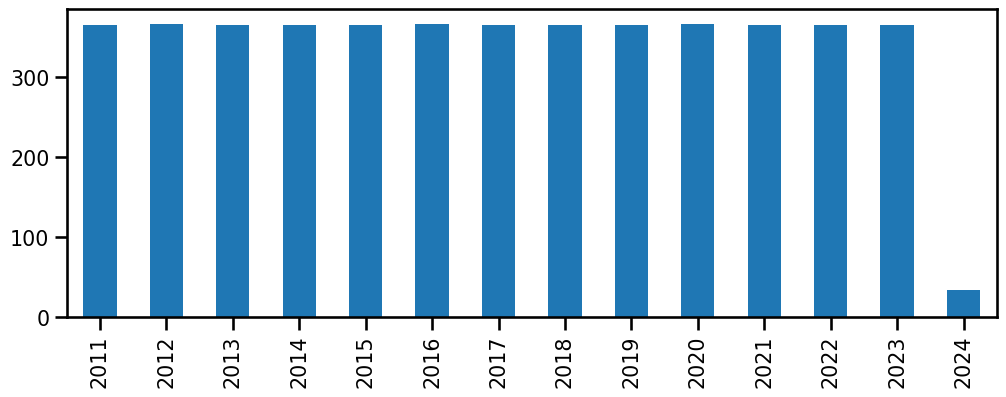

In [11]:
years = df.index.year
years.value_counts().sort_index().plot(kind='bar');

In [12]:
## keeping 2011 to present
df = df.loc['2011':]
df.index


DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-02 00:00:00+00:00',
               '2011-01-03 00:00:00+00:00', '2011-01-04 00:00:00+00:00',
               '2011-01-05 00:00:00+00:00', '2011-01-06 00:00:00+00:00',
               '2011-01-07 00:00:00+00:00', '2011-01-08 00:00:00+00:00',
               '2011-01-09 00:00:00+00:00', '2011-01-10 00:00:00+00:00',
               ...
               '2024-01-25 00:00:00+00:00', '2024-01-26 00:00:00+00:00',
               '2024-01-27 00:00:00+00:00', '2024-01-28 00:00:00+00:00',
               '2024-01-29 00:00:00+00:00', '2024-01-30 00:00:00+00:00',
               '2024-01-31 00:00:00+00:00', '2024-02-01 00:00:00+00:00',
               '2024-02-02 00:00:00+00:00', '2024-02-03 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=4782, freq=None)

## Inspecting the Data Format

In [13]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Description'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8))

KeyError: 'Description'

In [ ]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Description'].value_counts().to_frame('Total # of Crimes')
crime_counts

In [ ]:
# display with an inline-barplot inside your df
crime_counts.style.bar('Total # of Crimes')

## Using Dictionaries and Loops to Prepare Time Series

In [14]:
## demoing groupby with .counts() vs .size()
df.groupby("Description").count().head()


KeyError: 'Description'

In [ ]:
df.groupby("Description").size().head()


 Notice that our .size() results match the "Total Incidents". It produced the same final answer, but with a much cleaner output.

## Testing 1 crime first

In [ ]:
## making our dictionary 
CRIMES = {}


In [ ]:
## Lets test 1 crime before we create our loop
crime ='ROBBERY'
crime


In [ ]:
# I. Save a temp df of just the rows that match the crime
temp = df.loc[ df['Description']==crime]
temp.head(3)

In [ ]:
# II. Resample the temp DataFrame as Daily data (crime counts)
# and keep ONLY the .size()
temp_res = temp.resample("D").size()
temp_res


In [ ]:
#III. Save the temporary DataFrame in the dictionary, #using the crime description as the key.
CRIMES[crime] = temp_res.copy()
CRIMES.keys()


In [ ]:
CRIMES['ROBBERY']


## Making Our Loop

In [ ]:
# 1. get list of  unique crime descriptions
crime_list = df['Description'].unique()
crime_list


In [ ]:
# 2. Create an empty dictionary  
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df.loc[ df['Description']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("D").size() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()


In [ ]:
CRIMES['SHOOTING']


In [ ]:
crimes_df = pd.DataFrame(CRIMES)
crimes_df


In [ ]:
## saving to disk for later
crimes_df.to_csv("Data/Baltimore")

# Time Zones

In [ ]:
## testing our saved data
df = pd.read_csv("Data/Part_1_Crime_Data.csv", parse_dates=['CrimeDateTime'], index_col=0)

In [ ]:
## check our df.index
df.index


In [ ]:
df = df.resample('D').asfreq()
df.head(3)

In [ ]:
ts0 = df.index[0]
ts0


In [ ]:
# checking the documentation for astimezone
ts0.astimezone?


In [ ]:
import pytz
all_tzs = pytz.all_timezones
len(all_tzs)


In [ ]:
## getting just US timezones
[tz for tz in all_tzs if tz.startswith('US')]


In [ ]:
## let's try converting to US Eastern
ts0.astimezone('US/Eastern')

In [ ]:
## Viewing original 
ts0


In [ ]:
## let's try converting to US Pacific
ts0.astimezone('US/Pacific')


In [ ]:
## remove time zone from the dt index
df = df.tz_convert(None)
df.head(3)
